In [81]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

#图直接显示在notebook上
pd.set_option('display.width',1000)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
from scipy import stats, integrate

In [2]:
x=np.linspace(0,14,50,endpoint=True) #在指定的间隔内返回均匀间隔的数字
x

array([ 0.        ,  0.28571429,  0.57142857,  0.85714286,  1.14285714,
        1.42857143,  1.71428571,  2.        ,  2.28571429,  2.57142857,
        2.85714286,  3.14285714,  3.42857143,  3.71428571,  4.        ,
        4.28571429,  4.57142857,  4.85714286,  5.14285714,  5.42857143,
        5.71428571,  6.        ,  6.28571429,  6.57142857,  6.85714286,
        7.14285714,  7.42857143,  7.71428571,  8.        ,  8.28571429,
        8.57142857,  8.85714286,  9.14285714,  9.42857143,  9.71428571,
       10.        , 10.28571429, 10.57142857, 10.85714286, 11.14285714,
       11.42857143, 11.71428571, 12.        , 12.28571429, 12.57142857,
       12.85714286, 13.14285714, 13.42857143, 13.71428571, 14.        ])

In [3]:
def sinplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,7): #为了画7条线
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

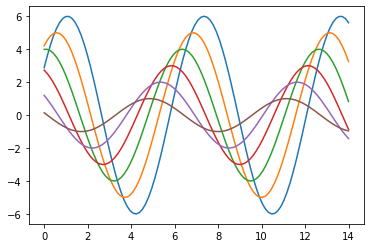

In [4]:
sinplot()

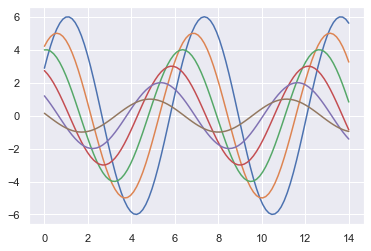

In [6]:
sns.set() #使用seaborn默认的风格与设置
sinplot()

# 5种主题风格 #
***使用方法：***sns.set_style("whitegrid")  
***darkgrid ***   灰色背景,加横线条   
***whitegrid ***  白色背景，加横线条  
***dark ***    纯灰色，无线条（刻度线）  
***white ***   纯白色  
***wicks ***   加上线段标记（凸出）  

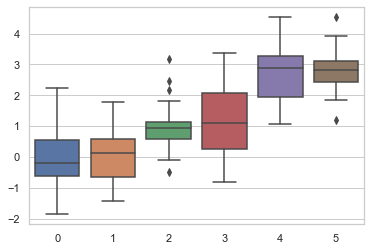

In [36]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data,palette="deep")

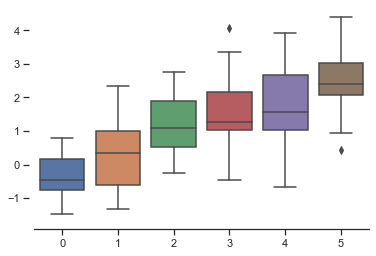

In [37]:
sns.set_style("ticks")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
sns.despine(offset=5)
sns.despine(left=True) #隐藏左轴left,底部bottom

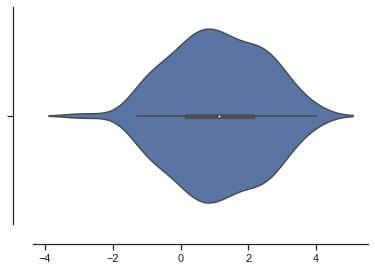

In [35]:
sns.violinplot(data)
sns.despine(offset=20) #距离轴线的距离

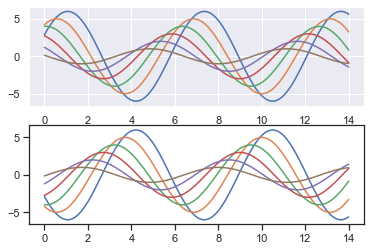

In [38]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

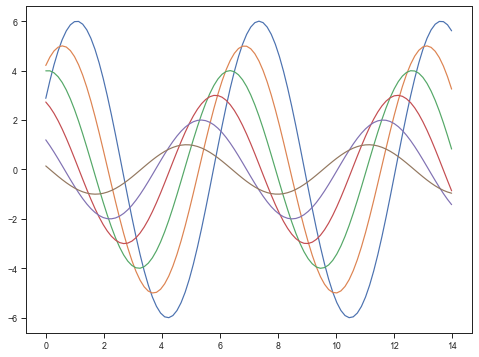

In [42]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

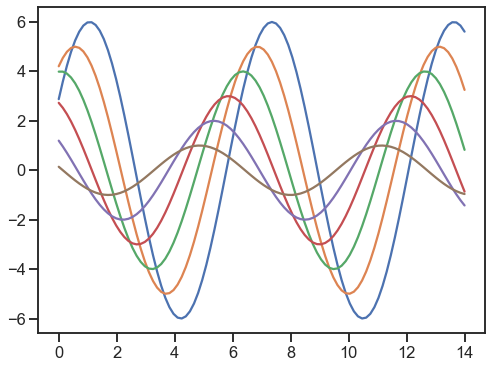

In [43]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

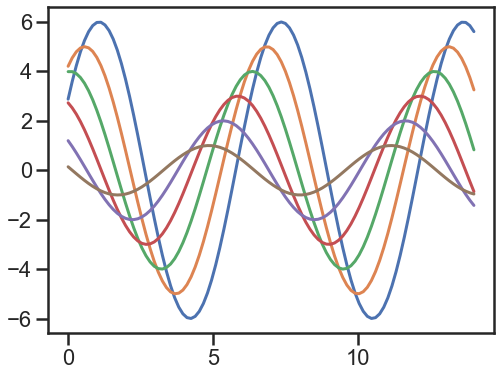

In [44]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

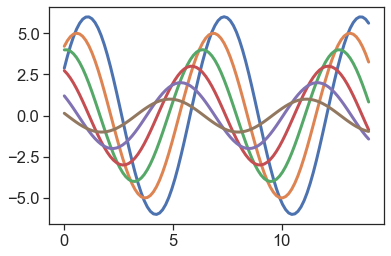

In [47]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":3})
sinplot()

# 颜色

### 调色板 ###
* 颜色很重要  
* ***color_palette()：***能传入任何Matplotlib所支持的颜色
* color_palette()不写参数则默认颜色
* set_palette()设置所有图的颜色

### 分类色板 ###

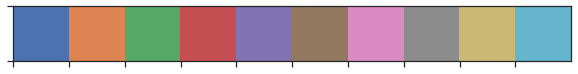

In [50]:
current_palette = sns.color_palette()#颜色的默认设置
sns.palplot(current_palette)

6个默认的颜色循环主题： deep, muted, pastel, bright, dark, colorblind

### 圆形画板 ###

当你有六个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色(这样的色调会保持亮度和饱和度不变)。这是大多数的当他们需要使用比当前默认颜色循环中设置的颜色更多时的默认方案。

最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。

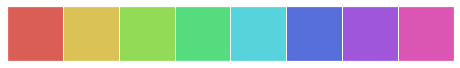

In [6]:
sns.palplot(sns.color_palette("hls", 8)) #可以指定颜色数量

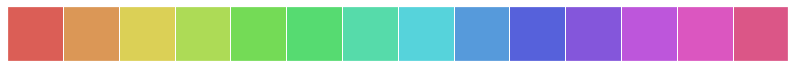

In [7]:
sns.palplot(sns.color_palette("hls", 14)) 

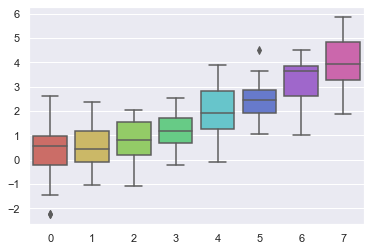

In [12]:
data = np.random.normal(size=(20, 8)) + np.arange(8) / 2
sns.boxplot(data=data,palette=sns.color_palette("hls", 8))

***hls_palette()：***函数来控制颜色的亮度和饱和
* l-亮度 lightness 
* s-饱和 saturation

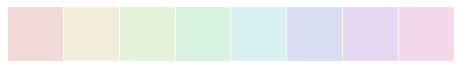

In [28]:
#l=.7, s=.9，设置颜色亮度和饱和度
sns.palplot(sns.hls_palette(8, l=0.9, s=.5)) 

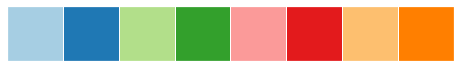

In [30]:
#Paired调出"成对"的颜色 4组8个颜色
sns.palplot(sns.color_palette("Paired",8))

###  使用xkcd颜色来命名颜色 ###
***xkcd_rgb:***包含了一套众包努力的针对随机RGB色的命名。产生了954个可以随时通过xdcd_rgb字典中调用的命名颜色。

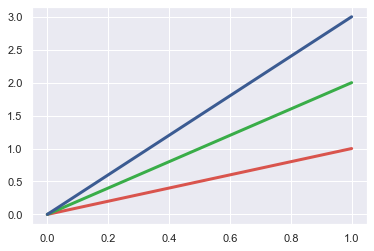

In [23]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3)

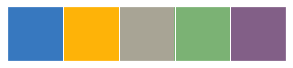

In [31]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

###  连续渐变色板 ###
色彩随数据变换，比如数据越来越重要则颜色越来越深

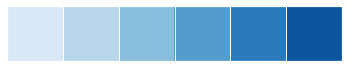

In [32]:
sns.palplot(sns.color_palette("Blues"))

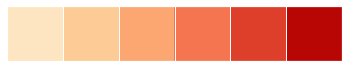

In [39]:
sns.palplot(sns.color_palette("OrRd"))

如果想要翻转渐变，可以在面板名称中添加一个_r后缀

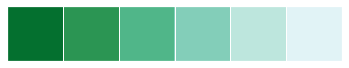

In [35]:
sns.palplot(sns.color_palette("BuGn_r"))

In [40]:
?sns.color_palette

###  cubehelix_palette()调色板 ###  
色调线性变换

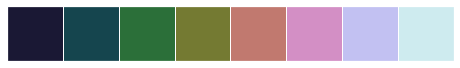

In [41]:
sns.palplot(sns.color_palette("cubehelix", 8))

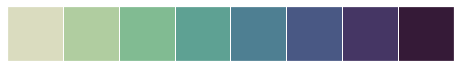

In [45]:
sns.palplot(sns.cubehelix_palette(8, start=.8, rot=-.9))

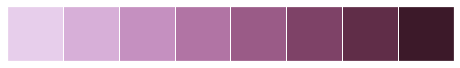

In [46]:
sns.palplot(sns.cubehelix_palette(8, start=.75, rot=-.150))

###  light_palette() 和dark_palette()调用定制连续调色板  ###

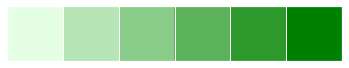

In [47]:
sns.palplot(sns.light_palette("green"))#由深到浅

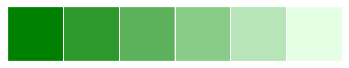

In [62]:
sns.palplot(sns.light_palette("green", reverse=True)) #reverse将颜色反转,相当于dark_palette

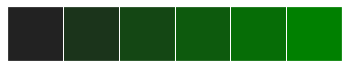

In [59]:
sns.palplot(sns.dark_palette("green"))#由深到浅

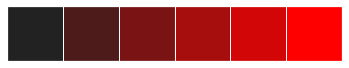

In [61]:
sns.palplot(sns.dark_palette("red"))

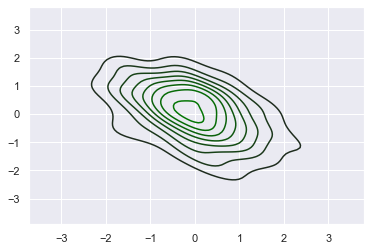

In [63]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
pal = sns.dark_palette("green", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

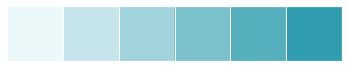

In [64]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

# 单变量分析绘图

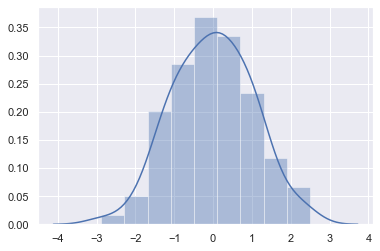

In [68]:
x = np.random.normal(size=100)
sns.distplot(x) 

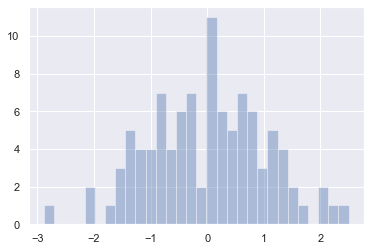

In [75]:
sns.distplot(x,bins=30,kde=False)#kde设置曲线是否存在，默认是True

### 数据分布情况  ###

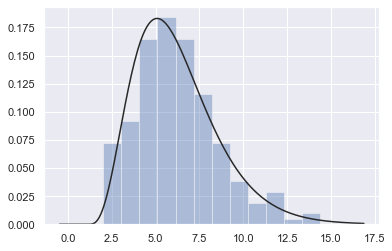

In [85]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

# 多变量分析绘图

根据均值和协方差生成数据

In [99]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head(20)

,x,y
0,1.853152,1.952333
1,-0.420142,1.203280
2,0.976771,1.271072
3,-0.411789,1.519515
4,-0.997300,-1.475147
5,0.669117,1.102920
6,-2.417619,-0.069623
7,-1.859804,-1.196027
8,1.130203,0.442594
9,0.157223,1.370117


###  观测两个变量之间的分布关系最好用散点图 ###

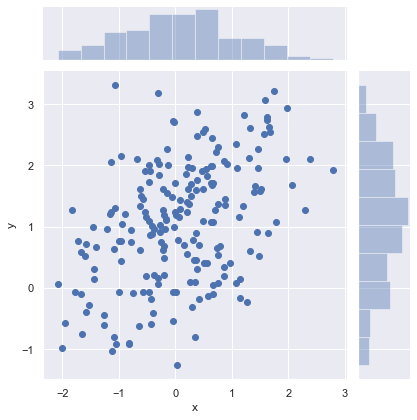

In [91]:
#jointplot 将x,y变量的关系，以及本身的直方图分布
sns.jointplot(x="x", y="y", data=df)

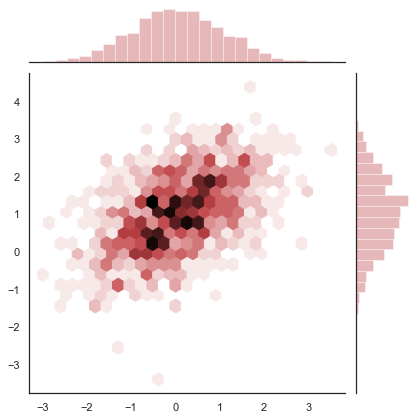

In [102]:
#kind="hex"图,数据量比较大时，点容易被覆盖时使用
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="r")

### 鸢尾花数据集

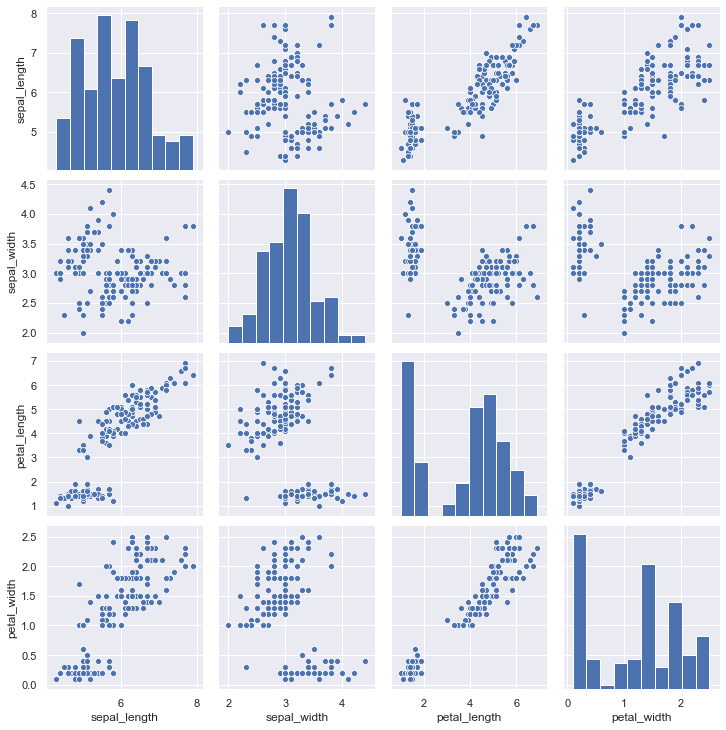

In [120]:
# seaborn内置的数据集iris，鸢尾花
# pairplot自动将指标两两对比，并且画出来
iris = sns.load_dataset("iris") 
sns.pairplot(iris)

### 账单数据集

In [118]:
tips = sns.load_dataset("tips") #账单数据集
tips.head()#账单，消费，性别，吸烟，日期，时间，人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


regplot()和lmplot()都可以绘制回归关系,推荐regplot()

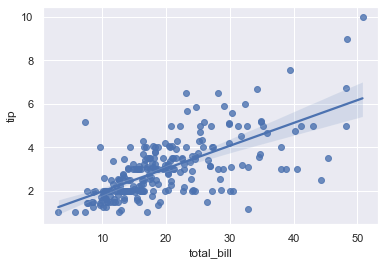

In [108]:
sns.regplot(x="total_bill", y="tip", data=tips)

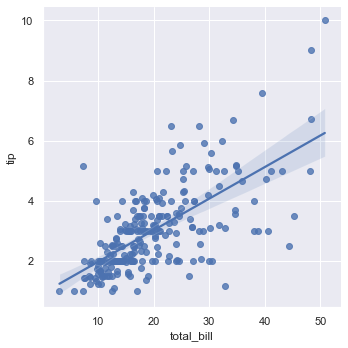

In [109]:
sns.lmplot(x="total_bill", y="tip", data=tips);

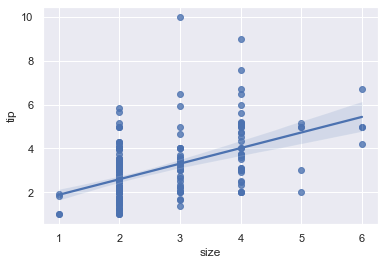

In [110]:
sns.regplot(data=tips,x="size",y="tip")

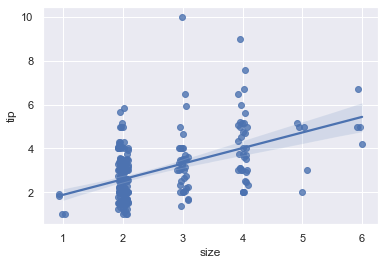

In [117]:
sns.regplot(x="size", y="tip", data=tips, x_jitter=.09)#在原始数据集上加上一些抖动/浮动范围的数据集

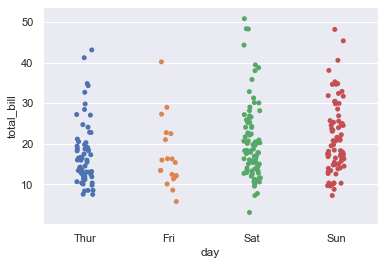

In [158]:
sns.stripplot(x='day',y='total_bill',data=tips)

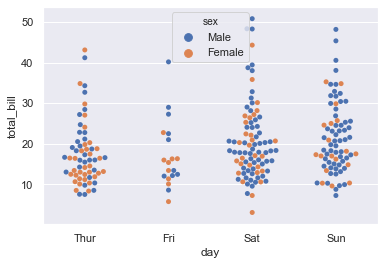

In [132]:
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips)

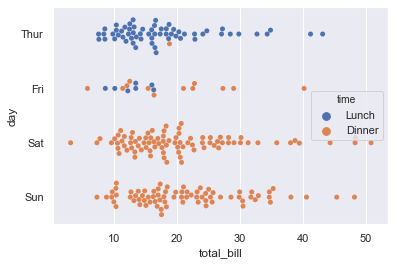

In [136]:
sns.swarmplot(x='total_bill',y='day',hue='time',data=tips) #x,y置换顺序，可以让图横过来

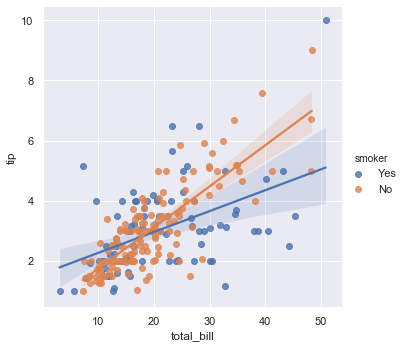

In [165]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

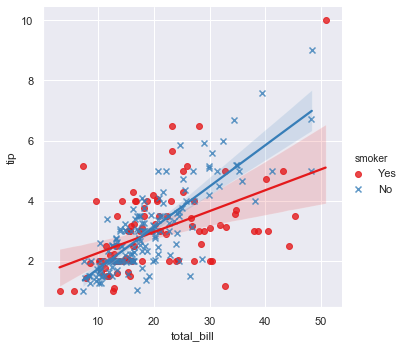

In [166]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

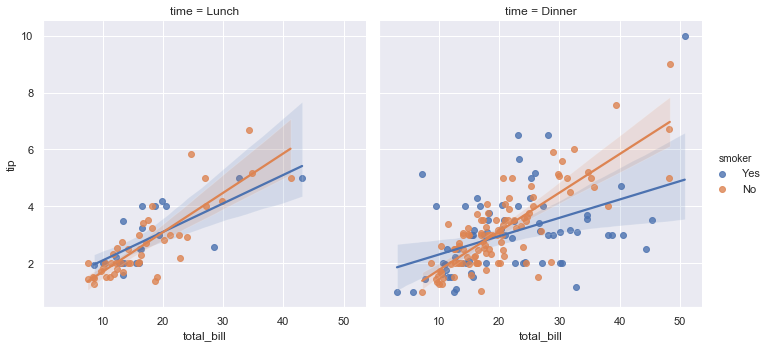

In [167]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

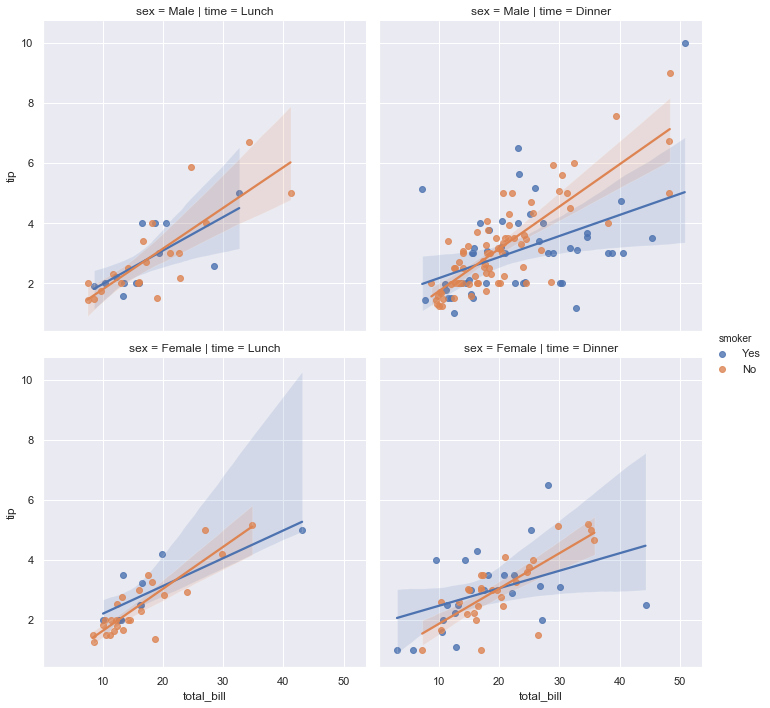

In [168]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

d:\software\python\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


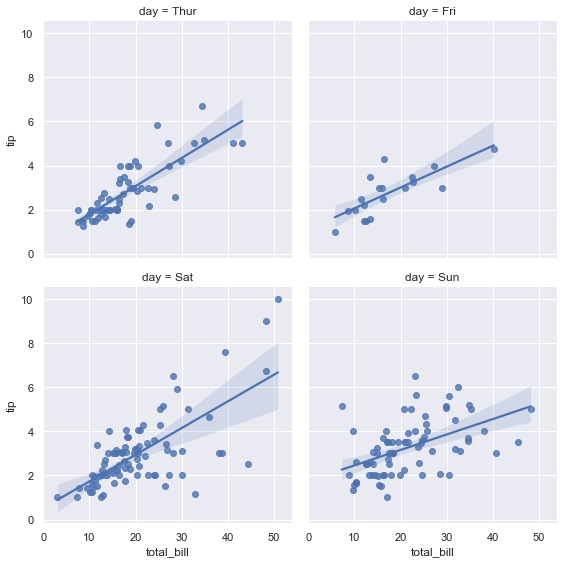

In [169]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=4);

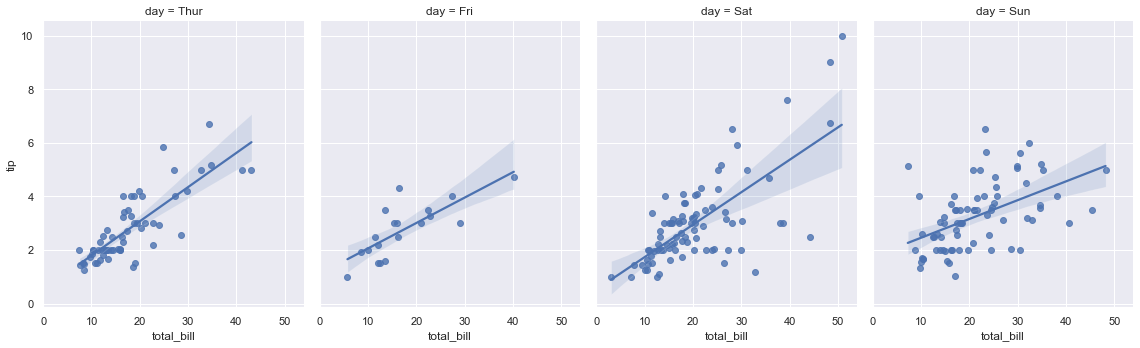

In [170]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.8);

### 盒图  ###
* IQR即统计学概念四分位距，第一/四分位与第三/四分位之间的距离
* N = 1.5IQR 如果一个值>Q3+N或　<　Ｑ1-N,则为离群点

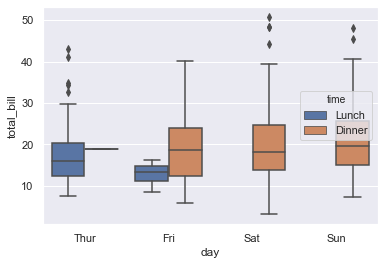

In [137]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

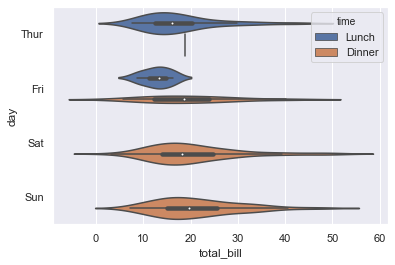

In [139]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);#小提琴图

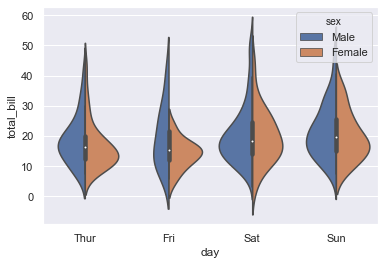

In [140]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

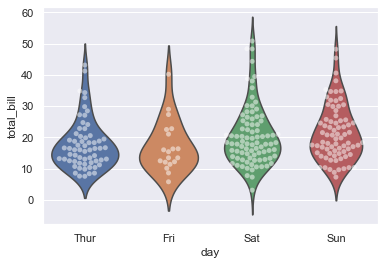

In [144]:
#组合图
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

# x,y两个变量直接的分析

In [161]:
anscombe = sns.load_dataset("anscombe") 
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


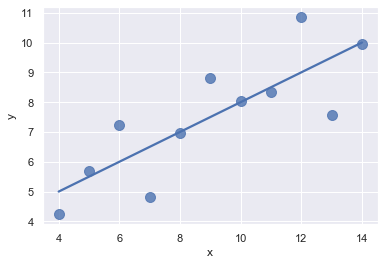

In [162]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 100})

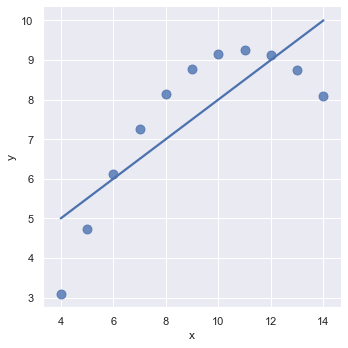

In [163]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

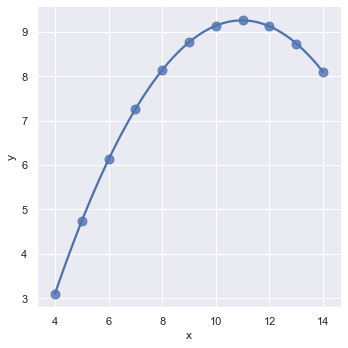

In [164]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

# 分类属性绘图

显示值的集中趋势可以用条形图

In [156]:
titanic = sns.load_dataset("titanic") # #泰坦尼克数据集
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


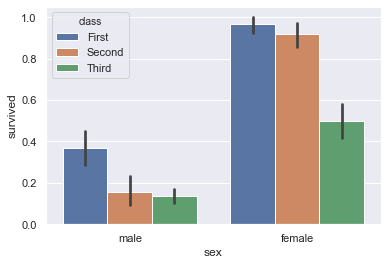

In [157]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);